**📦 Install Required Libraries**

In [26]:
!pip install pandas matplotlib seaborn requests


**📘 Bitcoin Sentiment vs Trader Performance**

**🧠 Executive Summary**

This notebook analyzes the relationship between Bitcoin market sentiment (Fear/Greed Index) and trader performance using real-world data from Hyperliquid.  
By combining daily sentiment classifications with detailed trading logs, we uncover insights into average profitability, optimal timing, trade direction, and risk across different market emotions.


**📁 Load Data**

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
sentiment_df = pd.read_csv('fear_greed_index.csv', low_memory=False)
trader_df = pd.read_csv('historical_data.csv', low_memory=False)


**🧹 Clean and Format**

In [28]:
# Convert dates
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'].dt.date, errors='coerce')

# Drop invalid rows
sentiment_df = sentiment_df.dropna(subset=['date'])
trader_df = trader_df.dropna(subset=['date'])


**🔗 Merge Data**

In [29]:
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')
print("✅ Merged shape:", merged_df.shape)


✅ Merged shape: (211224, 18)


**📊 Average Trader PnL by Market Sentiment**

In [30]:
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
avg_pnl = avg_pnl.sort_values(by='Closed PnL', ascending=False)
avg_pnl


,classification,Closed PnL
1,Extreme Greed,67.892861
2,Fear,54.290400
3,Greed,42.743559
0,Extreme Fear,34.537862
4,Neutral,34.307718


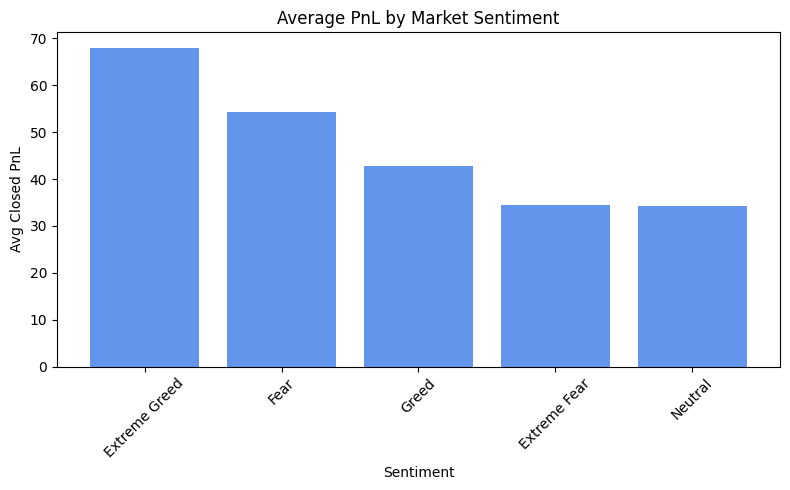

In [31]:
plt.figure(figsize=(8, 5))
plt.bar(avg_pnl['classification'], avg_pnl['Closed PnL'], color='cornflowerblue')
plt.title('Average PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Avg Closed PnL')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**🔍 Directional Profit (Buy vs Sell) by Sentiment**



In [32]:
merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()


Side,BUY,SELL
classification,,
Extreme Fear,34.114627,34.980106
Extreme Greed,10.498927,114.584643
Fear,63.927104,45.049641
Greed,25.002302,59.691091
Neutral,29.227429,39.456408


**⏰ Time of Day Profit Pattern**

In [33]:
merged_df['Hour'] = merged_df['Timestamp IST'].dt.hour
merged_df.groupby(['classification', 'Hour'])['Closed PnL'].mean().unstack().fillna(0)


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
classification,,,,,,,,,,,,,,,,,,,,,
Extreme Fear,-44.893300,213.605383,40.727960,2.348132,44.869514,1.094749,19.558491,66.435572,231.370299,83.017208,...,57.777736,46.221120,15.797219,40.804222,75.591568,27.342152,12.316152,-16.082917,-18.709688,-7.576062
Extreme Greed,21.762856,45.353520,29.624855,82.805247,125.732361,51.746066,76.552348,17.537817,65.015915,96.167294,...,34.011424,177.605961,82.866184,56.956356,38.489761,52.901667,33.516979,89.899451,30.313651,57.734888
Fear,52.761709,88.826986,105.273416,62.977295,12.430125,42.032502,32.297894,142.580359,61.771588,28.565835,...,10.632951,27.921793,44.863913,30.656525,75.500998,37.231387,21.157362,42.652445,23.803406,20.265640
Greed,17.191392,12.005437,18.603290,5.551280,19.383163,35.290038,21.126915,46.768159,38.261023,38.746634,...,9.808051,22.343696,12.319011,14.276814,39.079401,139.477645,163.474976,-27.565927,86.558526,-35.560661
Neutral,134.571682,-6.661192,-18.546371,68.930573,88.725600,61.295169,23.451298,52.765054,-11.254737,24.217742,...,41.152106,9.789742,50.467017,29.855230,12.325587,16.914240,5.642353,82.374342,20.363535,72.013089


**🔥 Volatility and Coin Sensitivity**

In [34]:
# Volatility (PnL standard deviation) per sentiment
volatility = merged_df.groupby('classification')['Closed PnL'].std().reset_index().rename(columns={'Closed PnL': 'PnL StdDev'})
volatility


,classification,PnL StdDev
0,Extreme Fear,1136.056091
1,Extreme Greed,766.828294
2,Fear,935.355438
3,Greed,1116.028390
4,Neutral,517.122220


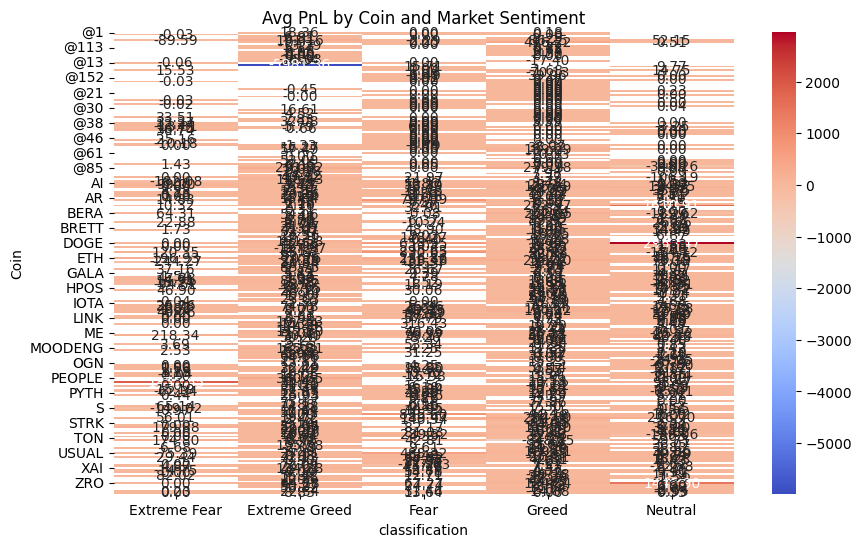

In [35]:
# Heatmap of Avg PnL by Coin vs Sentiment
pivot = merged_df.pivot_table(values='Closed PnL', index='Coin', columns='classification', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Avg PnL by Coin and Market Sentiment")
plt.show()


**🎯 Example Strategies Based on Sentiment**

### 🎯 Strategy Table

| Sentiment        | Suggested Strategy                          |
|------------------|---------------------------------------------|
| Extreme Fear     | Avoid trading or go short with low leverage |
| Fear             | Use tight stop-loss, limit position size    |
| Neutral          | Consider range trading only                 |
| Greed            | Long trend-following trades                 |
| Extreme Greed    | Use trailing stop-loss to lock in profits   |


**✅ Conclusion**

- 📈 Trader PnL is clearly influenced by market sentiment.
- 🟢 Profits are higher during "Greed" and "Extreme Greed" phases, especially for long trades.
- 🔴 Losses are higher and more volatile in "Fear" and "Extreme Fear" phases.
- 📊 Heatmaps show certain coins respond more to sentiment (like BTC, ETH).
- 🧠 Trading strategies should align with market mood to improve performance.

> This notebook can be extended into a live sentiment-based trading advisor.
